In [21]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

In [40]:
data=pd.read_csv(r"C:\Users\91950\Downloads\Project 15.0\titanic_train.csv")
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [41]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

The Titanic Problem is based on the sinking of the ‘Unsinkable’ ship Titanic in early 
1912. It gives you information about multiple people like their ages, sexes, sibling 
counts, embarkment points, and whether or not they survived the disaster. Based on 
these features, you have to predict if an arbitrary passenger on Titanic would survive the 
sinking or not.

In [42]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [43]:
# Fill missing values
data["Age"].fillna(data["Age"].median(), inplace=True)
data["Embarked"].fillna(data["Embarked"].mode()[0], inplace=True)
data.drop(columns=["Cabin"], inplace=True) #too many missing values

In [44]:
data.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [45]:
#checking data types
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object

In [17]:
# Encode categorical variables
label_encoder = LabelEncoder()
data["Sex"] = label_encoder.fit_transform(data["Sex"])
data["Embarked"] = label_encoder.fit_transform(data["Embarked"])

In [46]:
# Encoding 'Sex' column (Male: 1, Female: 0)
data['Sex'] = data['Sex'].map({'male': 1, 'female': 0})

# One-hot encoding 'Embarked' column
data = pd.get_dummies(data, columns=['Embarked'], drop_first=True)  # Dropping first to avoid multicollinearity

In [ ]:
#visualizations

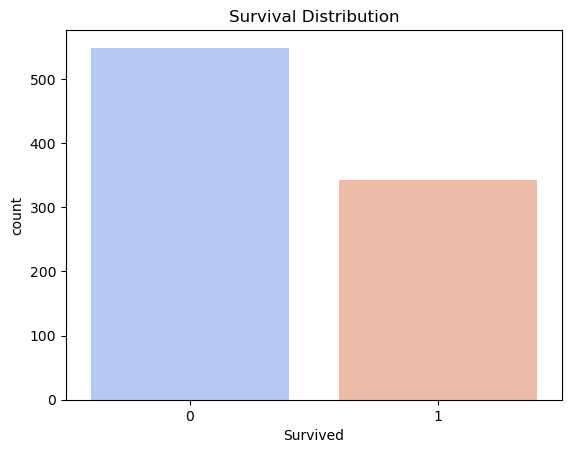

In [22]:
# Countplot of Survival
sns.countplot(x='Survived', data=data, palette='coolwarm')
plt.title("Survival Distribution")
plt.show()
#More people did not survive than those who survived.


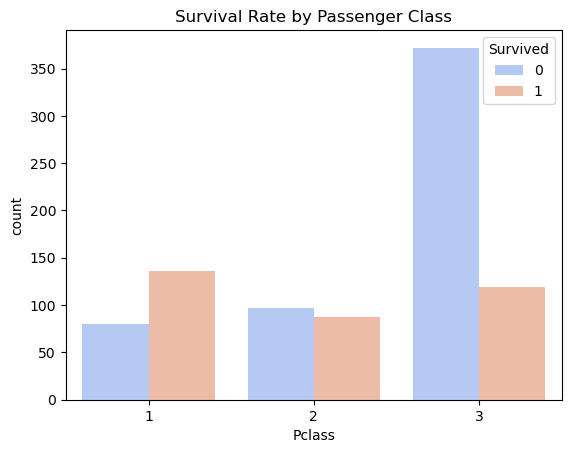

In [26]:
# Survival by Passenger Class
sns.countplot(x='Pclass', hue=data['Survived'].astype(str), data=data, palette='coolwarm')
plt.title("Survival Rate by Passenger Class")
plt.show()

#First-class passengers had a higher survival rate than second or third class.
#Third-class passengers had the lowest survival rate.

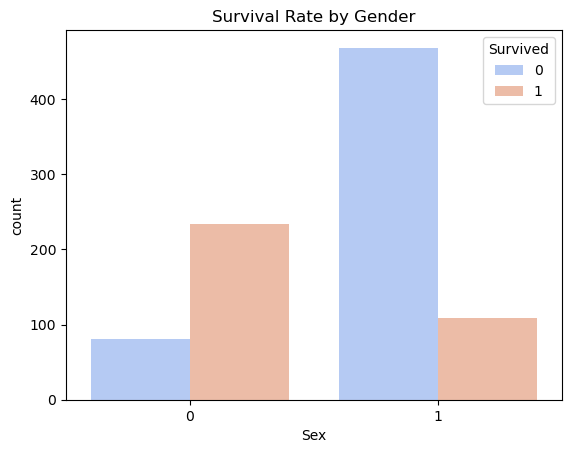

In [30]:
# Survival based on Gender
sns.countplot(x='Sex', hue=data['Survived'].astype(str), data=data, palette='coolwarm')
plt.title("Survival Rate by Gender")
plt.show()

#Females had a significantly higher survival rate than males.This may be as many women and children as possible were protected and left ship first.


C:\Users\91950\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


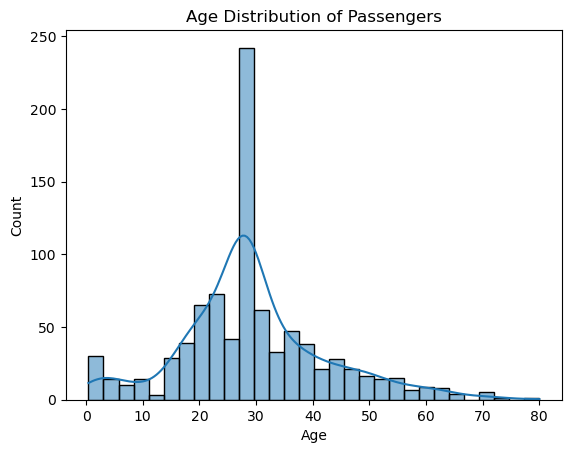

In [32]:
# Age distribution of passengers
sns.histplot(data['Age'], bins=30, kde=True)
plt.title("Age Distribution of Passengers")
plt.show()
# Ages ranged between children to senior citizens. Most passengers were between 20-40 years old.


C:\Users\91950\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


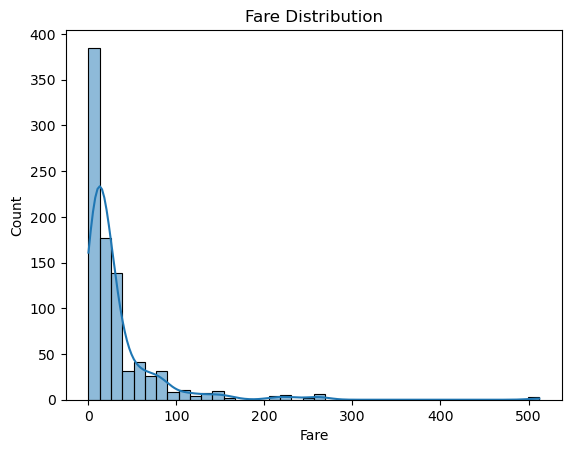

In [33]:
# Distribution of Fare
sns.histplot(data['Fare'], bins=40, kde=True)
plt.title("Fare Distribution")
plt.show()
#Most passengers paid lower fares, indicating many were from the third class. which explains why least people survived in third class.

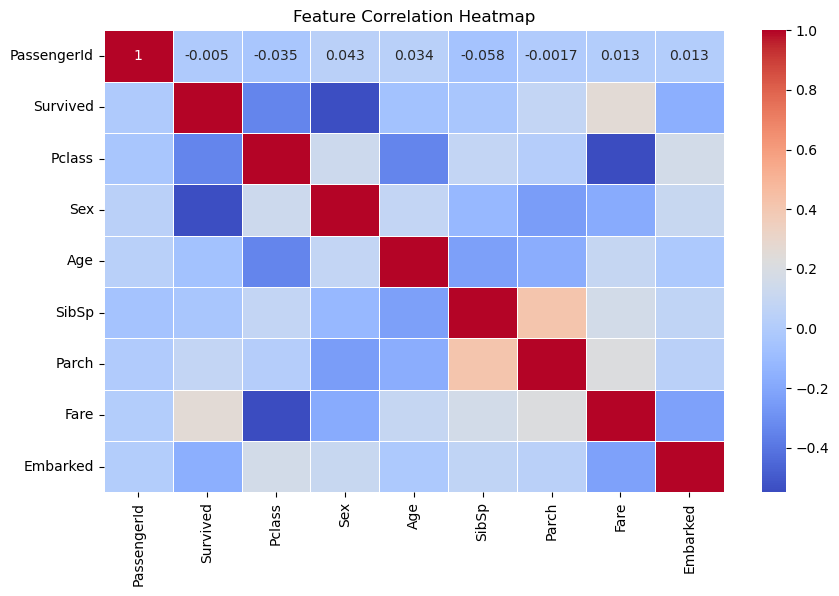

In [36]:
#Heatmap of correlations
numeric_data = data.select_dtypes(include=['number'])

plt.figure(figsize=(10,6))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


In [37]:
# Compute correlation matrix
numeric_data = data.select_dtypes(include=['number'])
correlation_matrix = numeric_data.corr()

# Print the correlation matrix
print(correlation_matrix)

             PassengerId  Survived    Pclass       Sex       Age     SibSp  \
PassengerId     1.000000 -0.005007 -0.035144  0.042939  0.034212 -0.057527   
Survived       -0.005007  1.000000 -0.338481 -0.543351 -0.064910 -0.035322   
Pclass         -0.035144 -0.338481  1.000000  0.131900 -0.339898  0.083081   
Sex             0.042939 -0.543351  0.131900  1.000000  0.081163 -0.114631   
Age             0.034212 -0.064910 -0.339898  0.081163  1.000000 -0.233296   
SibSp          -0.057527 -0.035322  0.083081 -0.114631 -0.233296  1.000000   
Parch          -0.001652  0.081629  0.018443 -0.245489 -0.172482  0.414838   
Fare            0.012658  0.257307 -0.549500 -0.182333  0.096688  0.159651   
Embarked        0.013128 -0.167675  0.162098  0.108262 -0.018754  0.068230   

                Parch      Fare  Embarked  
PassengerId -0.001652  0.012658  0.013128  
Survived     0.081629  0.257307 -0.167675  
Pclass       0.018443 -0.549500  0.162098  
Sex         -0.245489 -0.182333  0.108262  

In [38]:
print(correlation_matrix.head()) #top 5

             PassengerId  Survived    Pclass       Sex       Age     SibSp  \
PassengerId     1.000000 -0.005007 -0.035144  0.042939  0.034212 -0.057527   
Survived       -0.005007  1.000000 -0.338481 -0.543351 -0.064910 -0.035322   
Pclass         -0.035144 -0.338481  1.000000  0.131900 -0.339898  0.083081   
Sex             0.042939 -0.543351  0.131900  1.000000  0.081163 -0.114631   
Age             0.034212 -0.064910 -0.339898  0.081163  1.000000 -0.233296   

                Parch      Fare  Embarked  
PassengerId -0.001652  0.012658  0.013128  
Survived     0.081629  0.257307 -0.167675  
Pclass       0.018443 -0.549500  0.162098  
Sex         -0.245489 -0.182333  0.108262  
Age         -0.172482  0.096688 -0.018754  


In [39]:
print(correlation_matrix['Survived'].sort_values(ascending=False))


Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.064910
Embarked      -0.167675
Pclass        -0.338481
Sex           -0.543351
Name: Survived, dtype: float64


In [ ]:
#Passenger class, fare, and gender were key factors affecting survival.
#Women and higher-class passengers had higher survival chances.
#People who paid higher fares had a better chance of surviving.
#Families tended to travel together, but their survival wasn’t strongly correlated.

In [48]:
#dropping uneccesary columns
#Name and Ticket are non-numeric and don't seem useful.
#PassengerId is just an identifier, not relevant for modeling.
data.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)

In [50]:
# Split dataset
X = data.drop("Survived", axis=1)
y = data["Survived"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [51]:
#feature scaling
scaler = StandardScaler()
X_train[['Age', 'Fare']] = scaler.fit_transform(X_train[['Age', 'Fare']])
X_test[['Age', 'Fare']] = scaler.transform(X_test[['Age', 'Fare']])


In [52]:
# Train multiple models
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42)
}

In [55]:
models = {
    "Logistic Regression": LogisticRegression(solver='liblinear', C=0.5, max_iter=200),  # Adjust regularization
    "Random Forest": RandomForestClassifier(n_estimators=200, max_depth=10, min_samples_split=5, random_state=42),
    "SVM": SVC(C=1, kernel='rbf', gamma='scale', probability=True),  # Use RBF kernel & scale gamma
    "KNN": KNeighborsClassifier(n_neighbors=7, weights='distance', metric='euclidean'),  # More neighbors & weighted distance
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=200, learning_rate=0.05, max_depth=3, random_state=42)  # Adjust learning rate
}

In [56]:
best_model = None
best_accuracy = 0

In [57]:
# Evaluate models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy:.4f}")
    
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = model

Logistic Regression Accuracy: 0.7821
Random Forest Accuracy: 0.8268
SVM Accuracy: 0.8156
KNN Accuracy: 0.7933
Gradient Boosting Accuracy: 0.8101


In [58]:
# Save the best model using Pickle
with open("best_titanic_model.pkl", "wb") as file:
    pickle.dump(best_model, file)

print(f"Best model saved: {best_model.__class__.__name__} with accuracy {best_accuracy:.4f}")


Best model saved: RandomForestClassifier with accuracy 0.8268
